# NLP Project - Text Summarization applied to French news articles

<blockquote>

Instructions : https://docs.google.com/document/d/1ijqISks5L_ioZwJi-VIRx5JLxk01Ao8wLYkN7L-R4RE/edit#

Lien Latex Report : https://fr.overleaf.com/7163467196bvrhtzpxryyg 

</blockquote>

*Project description*

## Proposal - TO SUPPRESS  

<blockquote>

Instructions :  

Provide details on your project . It should be a paragraph describing your project, what datasets you will be using, what modelling techniques and what evaluation you will be doing
</blockquote>

* **Possible Datasets in French :** 
 
    * [OrangeSum](https://github.com/Tixierae/OrangeSum) or ([link HunggingFace](https://huggingface.co/datasets/GEM/OrangeSum) ): dataset that was proposed for text summarization but in **French** (which is less studied in litterature than English) : articles with summaries, already grouped in categories (political, environment, ...) so we will be able to easily compare the perf of our model on different "subjects"

    \+ this dataset was proposed together with "[BARThez](https://huggingface.co/moussaKam/mbarthez?text=Paris+est+la+%3Cmask%3E+de+la+France.)", a seq2seq model proposed specifically for French and which is said to be more efficient than BERT-based models for French, above all for generative tasks ([associated article](https://arxiv.org/pdf/2010.12321.pdf))

  * [CASS](https://github.com/euranova/CASS-dataset) (summaries of "procès en cours de cassation", maybe less interesting and diverse than news articles)

  * [MLSum](https://huggingface.co/datasets/mlsum) & [XL-Sum](https://huggingface.co/datasets/csebuetnlp/xlsum) : datasets proposed by HuggingFace and composed of articles with abstracts on different languages, I guess we can concentrate on French subcorpus. It was originally proposed for multilingual text summarization ([see article for XLSum](https://arxiv.org/pdf/2106.13822v1.pdf) or [article for MLSum](https://arxiv.org/pdf/2004.14900v1.pdf))

  * [WikiLingual](https://paperswithcode.com/dataset/wikilingua) : article and summary pairs of Wikipedia articles in different languages



* **Possible Language models for French :**

  - [CamemBERT](https://camembert-model.fr/)
  - [FlauBERT](https://github.com/getalp/Flaubert)
  - [Deepfrench](https://github.com/tchambon/deepfrench) : pre-trained on Wikipedia corpuses, principally proposed for classification tasks
  - BARThez 

* **Description of the task and approach(es)** :

The idea of text summarization is to produce a summary of a text (or corpus of text if we want to extend it). There is two main possible approches :

**1. Extractive Approach :**

The first (maybe simplest) approach is to form a summary by selecting some sentences of the text (without modifying it at all). To do so, we need to find a way to "score" the sentences of the document to extract only the most revelant ones. 

An example of algorithm that we can try to implement is the TextRank algorithm, which is unsupervised and with few DL. The idea is to compute a similarity matrix between the sentences of our document, which can be done by computing similarities between embeddings of the sentences (with Seq2Vec for instance).

[Example of tuto really well detailed for Extractive Approach](https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python//)


**2. Abstractive Approach :**

A more advanced approach is to generate the summary, that is to say to produce a summary with sentences that we have generated and do not exist in the document to summarize. 

For this task, we may use DL, with models such as Transformers with Attention Mechanism (or Encoder-Decoder to start but it's more limited and should lead to worse perf than Transformers).

[Example of tuto really well detailed for Abstractive Approach](https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/)



**⇒ Proposal :**

Our project will focus on the text summarization task applied to the summarization of French written documents. (We will not cover multi-lingual models and summarization of corpus of documents, which are possible extensions of this task).

Formally, our goal will be to implement and compare different approaches to produce a summary from a given text. As a "baseline", we will implement the more "naive" method to adress this task, which is called "Extractive Approach" and is unsupervised : the idea is to choose some embeddings for the sentences of a text, and compute a similarity matrix to form a summary by extracting the most revelant sentences of our text. Then, we will study the more advanced "Abstractive approach", where the idea is to leverage deep learning models (Encoder-Decoder or Attention Mechanism of Transformers), to build supervised generative models that will generate new sentences to create a summary.

Concerning the datasets, we would like to train our models on news articles with their summaries in French, which can be found in datasets such as MLSum, XLSum or OrangeSum. As we are studying French written texts, we will use and compare some language models specific to French, such as FlauBERT, CamemBERT, DeepFrench or BARTHez. Moreover, to evaluate the performance of our generated summaries, we will use the ROUGE metric, which was specifically designed for this task and used in the litterature. We may also do some experiments by challenging our models on different type of texts, such as the ones available in WikiLingual or CASS.

## Imports

In [1]:
!pip install datasets transformers

     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 4.0 MB 28.0 MB/s 
     |████████████████████████████████| 136 kB 46.8 MB/s 
     |████████████████████████████████| 1.1 MB 42.9 MB/s 
     |████████████████████████████████| 212 kB 35.7 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 127 kB 48.9 MB/s 
     |████████████████████████████████| 6.6 MB 33.3 MB/s 
     |████████████████████████████████| 596 kB 39.3 MB/s 
     |████████████████████████████████| 895 kB 32.4 MB/s 
     |████████████████████████████████| 271 kB 11.1 MB/s 
     |████████████████████████████████| 144 kB 38.3 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling

In [2]:
!pip install rouge

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

from termcolor import colored

# To load datasets :
from datasets import load_dataset

# To pre-process and tokenize : 
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# To create dataloaders :
from torch.utils.data import Dataset, DataLoader

# To create our torch models :
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# To compute ROUGE score :
from rouge import Rouge

## Load Datasets

We have identified 3 datasets containing news article written in French : 

  * [OrangeSum](https://github.com/Tixierae/OrangeSum) or ([link HunggingFace](https://huggingface.co/datasets/GEM/OrangeSum) ) : dataset composed of French articles scrapped from "Orange Actu" website. Articles are provided with their title and short summary, and classified into 5 main categories : France, world, politics, automotive, and society. The society category is itself divided into 8 subcategories: health, environment, people, culture, media, high-tech, unusual ("insolite" in French), and miscellaneous.

  * [MLSum](https://huggingface.co/datasets/mlsum) & [XL-Sum](https://huggingface.co/datasets/csebuetnlp/xlsum) : datasets proposed by HuggingFace and composed of articles with their abstracts on different languages. It was originally proposed for multilingual text summarization, but we can choose to focus on the French subcorpus. Note that the considered articles will be mainly translations of originally English articles.

As the OrangeSum articles were originally written in French, we will mainly train our model on this dataset. The two other ones could be used to have a larger training dataset, or to try to apply our OrangeSum-trained model on other types of articles.

In [5]:
dataset_orangesum = load_dataset("GEM/OrangeSum", "abstract")

# dataset_xlsum = load_dataset("csebuetnlp/xlsum", "french")
# dataset_mlsum = load_dataset("mlsum", "fr")

Generating train split:   0%|          | 0/21401 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Dataset orange_sum downloaded and prepared to /root/.cache/huggingface/datasets/GEM___orange_sum/abstract/1.1.0/0886904dd6ac7849d4c9fcec77bf8d78622dd651739826ccc8436159b777f910. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
dataset_orangesum

DatasetDict({
    train: Dataset({
        features: ['gem_id', 'input', 'target', 'references'],
        num_rows: 21401
    })
    test: Dataset({
        features: ['gem_id', 'input', 'target', 'references'],
        num_rows: 1500
    })
    validation: Dataset({
        features: ['gem_id', 'input', 'target', 'references'],
        num_rows: 1500
    })
})

In [7]:
dataset_orangesum['train'][1]

{'gem_id': 'OrangeSum_abstract-train-1',
 'input': 'C\'est désormais officiel : Alain Juppé n\'est plus membre des Républicains. L\'ex-Premier ministre de Jacques Chirac, cofondateur de l\'UMP en 2002, ne paie plus sa cotisation auprès du parti de droite. Mercredi 9 janvier, le maire de Bordeaux a dénoncé un glissement qui s\'opère, selon lui, de la droite vers l\'extême droite. "Je me reconnais de moins en moins dans cette famille politique, à laquelle je suis pourtant très attaché (...). C\'est avec tristesse que je l\'ai quittée, mais il y a une dérive vers des thèses qui sont celles très proches de l\'extrême droite, et une ambiguïté sur l\'Europe", a-t-il déclaré face aux journalistes, réunis pour assister à ses voeux. "On assiste à cette espèce de transfusion régulière, et sur les thèmes de fond, il y a des moments où je me demande qui j\'entends à la radio ? Un membre de LR ou du RN ?", a insisté le maire de Bordeaux. Le même jour, l\'ex-député Thierry Mariani annonçait son dépa

In [8]:
# dataset_xlsum

In [9]:
# dataset_xlsum['train'][1]

In [10]:
# dataset_mlsum

In [11]:
# dataset_mlsum['train'][1]

## Pre-processing, Tokenization & Embedding

The first step is to pre-process by cleaning and tokenizing the given datasets, to create our DataLoaders. Here, we are dealing with articles and their summary, so we have the choice between using the sentence-level or the word-level. 

In [12]:
stop_words = stopwords.words('french')

In [13]:
print('Examples of stopwords in french :' , *stop_words[:20])

Examples of stopwords in french : au aux avec ce ces dans de des du elle en et eux il ils je la le les leur


### Cleaning & Tokenization 

In [14]:
def tokenize_clean_text (text, remove_stopwords=True, word_tokenizer = word_tokenize) : 
    """
    Tokenize and clean a given text
    Input : 
      text : string containing the text to clean and tokenize
      remove_stopwords : bool (default True) 
      word_tokenizer : tokenizer to use on words after tokenizing sentences
    Output : 
      list of token's list 
    """

    # Sentence tokenizer : 
    sentences = sent_tokenize(text, language='french')

    output = []
    for sent in sentences : 
        # Clean of the sentence : removes ponctuation, and lower the sentence
        clean_sent = re.sub(r'[^\w\s]','', sent.lower())

        # Tokenization of the sentence : 
        tok_clean_sent = word_tokenizer(clean_sent, language='french')

        # Removing of the stopwords :
        if remove_stopwords :
            tok_clean_sent = [w for w in tok_clean_sent if w not in stop_words]

        # Append to the output :
        output.append(tok_clean_sent)

    return output

### Vocabulary & Embedding

To model our text, we have to create a vocabulary, with a string-to-int (`stoi`) option. To have a better embedding for words than just using their index in the vocabulary, we can use pre-trained embeddings, which consists in Word-to-Vectors (Word2Vec) models. They assign to each word a vector, and are often pre-trained on a big corpus to try to model the studied language, that is to say to create vectors on which classical operations may have sense.

The two following strategies are really similar :    
  - in the first one, we build a vocabulary "from scratch", with the words that are within our corpus, and we use the pretrained embeddings to create a similarity matrix, by keeping the pre-trained vectors that interest us, that is to say that are in our built vocabulary
  - in the second one, we directly use the pre-trained vocabulary of the chosen embeddings, so our words will then be assign to the same index as in the pre-trained vocabulary (and a certain number of words of it may not be used).

In [15]:
UNK_IDX, PAD_IDX, SOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<sos>', '<eos>']

#### Chosen embeddings :

In [16]:
from torchtext.vocab import FastText, vocab

In [17]:
# Load of pretrained embeddings vectors :
pretrained_vectors_fasttext = FastText(language='fr')

.vector_cache/wiki.fr.vec: 3.03GB [01:25, 35.3MB/s]                            
100%|██████████| 1152449/1152449 [02:38<00:00, 7281.43it/s]


In [18]:
print(f'The pre-trained vocabulary contains {pretrained_vectors_fasttext.vectors.shape[0]} words, with embeddings in vectors of size {pretrained_vectors_fasttext.vectors.shape[1]}')

The pre-trained vocabulary contains 1152449 words, with embeddings in vectors of size 300


#### Vocabulary built from scratch & corresponding embedding matrix:

In [19]:
def vocab_update (corpus, text_features='input', vocabulary=None, remove_stopwords=True, word_tokenizer = word_tokenize, threshold=5) :
    """
    Update a given vocabulary or Create a new one, with the words of a given corpus of texts
    Inputs :
      - corpus : Dataset
      - text_features : name of the features in the dataset that contains text
      - vocabulary : dict or None, containing keys : 'stoi', 'counts' and 'nbwords'
      - remove_stopwords : bool
      - threshold : if set to an int value, remove from the vocabulary words with counts < threshold

    !!! Output a vocabulary is useful for the case of creating a vocabulary, 
    but the function also directly modify the input vocabulary if given
    """ 
    if vocabulary is None :
        # Create empty vocabulary :
        vocabulary = {'stoi': {}, 'counts': {}, 'nbwords': 0}
        # Add special symbols : 
        for t in special_symbols: 
            vocabulary['stoi'][t] = vocabulary['nbwords']
            vocabulary['counts'][t] = 1
            vocabulary['nbwords'] += 1

    # Update vocabulary :
    for document in tqdm(corpus) : 
        tokens = tokenize_clean_text(document[text_features], remove_stopwords=remove_stopwords, word_tokenizer=word_tokenizer)
        for sentence in tokens :
            for token in sentence : 
                if token not in vocabulary['stoi'].keys() :
                    vocabulary['stoi'][token] = vocabulary['nbwords']
                    vocabulary['nbwords'] += 1
                    vocabulary['counts'][token] =1
                else : 
                    vocabulary['counts'][token] +=1

    # Remove from vocabulary words with count <= threshold : 
    if threshold is not None :
        vocabulary_cleaned = {'stoi': {}, 'counts': {}, 'nbwords': 0}
        for k, v in vocabulary['counts'].items() : 
            if (k in special_symbols) or (v>threshold) :
                vocabulary_cleaned['stoi'][k] = vocabulary_cleaned['nbwords']
                vocabulary_cleaned['nbwords'] += 1
                vocabulary_cleaned['counts'][k] = vocabulary['counts'][k]
        print(f"Number of words removed due to the threshold : {vocabulary['nbwords']-vocabulary_cleaned['nbwords']}, ie {vocabulary_cleaned['nbwords']*100/vocabulary['nbwords']:.2f}% of the initial vocabulary")
        vocabulary = vocabulary_cleaned

    # itos creation : 
    vocabulary['itos'] = {v : k for k,v in vocabulary['stoi'].items()}

    return vocabulary

In [20]:
vocabulary_orangesum = vocab_update(dataset_orangesum['train'], text_features='input', threshold = 4)

  0%|          | 0/21401 [00:00<?, ?it/s]

Number of words removed due to the threshold : 144500, ie 23.17% of the initial vocabulary


In [21]:
print(f"Number of words kept in OrangeSum (training-text) vocabulary : {vocabulary_orangesum['nbwords']}")

Number of words kept in OrangeSum (training-text) vocabulary : 43584


In [22]:
def create_embedding_matrix (vocabulary, pretrained_vectors) : 
    """
    Build an embedding matrix (tensor format) from a given vocabulary, using the embedding vectors 
    contains in pretrained_vectors.
    Note that all words present in vocabulary but not in pretrained_vectors will be assigned
    a random embedding in Uniform([-1,1]), and their number will be printed at the end of the execution.
    """
    nb_words, embedding_dim = vocabulary['nbwords'], pretrained_vectors.vectors.shape[1]
    pretrained_vectors_words = pretrained_vectors.stoi.keys()

    # Creation of embedding matrix and counter for missing words :
    word_embedding_matrix = torch.zeros((nb_words, embedding_dim))
    nb_missing_words = 0

    # Completion of embedding matrix :
    for word, i in vocabulary['stoi'].items() :
        if word in pretrained_vectors_words:
            word_index = pretrained_vectors.stoi[word]
            word_embedding_matrix[i] = pretrained_vectors.vectors[word_index]
        else:
            # If word not in pretrained_vectors, create a random embedding :
            new_embedding = torch.zeros(embedding_dim).uniform_(-1,1) 
            word_embedding_matrix[i] = new_embedding
            nb_missing_words += 1

    print(f'Random new embeddings were created for {nb_missing_words} words, ie {nb_missing_words*100/nb_words:.2f}% of the vocabulary')

    return word_embedding_matrix

In [23]:
embedding_matrix_orangesum = create_embedding_matrix(vocabulary_orangesum, pretrained_vectors_fasttext)

Random new embeddings were created for 7913 words, ie 18.16% of the vocabulary


In [24]:
embedding_matrix_orangesum.shape

torch.Size([43584, 300])

#### Pre-trained vocabulary & embeddings : 

In [25]:
# Creation of the pre-trained vocabulary :
pretrained_vocab_fasttext = vocab(pretrained_vectors_fasttext.stoi, min_freq=0)

# We add our special symbols : 
for symbol_index, symbol in enumerate(special_symbols) : 
    pretrained_vocab_fasttext.insert_token(symbol, symbol_index)
pretrained_vocab_fasttext.set_default_index(UNK_IDX)

In [26]:
# Store embeddings in a tensor :
pretrained_embeddings_fasttext = pretrained_vectors_fasttext.vectors
pretrained_embeddings_fasttext = torch.cat((torch.zeros(4,pretrained_embeddings_fasttext.shape[1]),pretrained_embeddings_fasttext))
pretrained_embeddings_fasttext.size()

torch.Size([1152453, 300])

### Padding & Numericalization 

In [27]:
# def clean_tokenize_pad_numericalize_sent(text, vocabulary_stoi, max_length=(20,300), remove_stopwords=True, word_tokenizer=word_tokenize) :
#     """
#     Apply the cleanning and tokenizing previously refined function,
#     and then numericalize the text, by attributing to each word its indice in 
#     a given vocabulary. 
#     With max_length=(text_length, seq_length), we pad the text in text_length sequences of seq_length words.
#     """

#     tokens = tokenize_clean_text(text, remove_stopwords=remove_stopwords, word_tokenizer=word_tokenizer)

#     result = []

#     text_length, seq_length = max_length
    
#     # Numericalize and pad sentences :
#     for sequence in tokens :
#         seq = [vocabulary_stoi['<sos>']] + [ vocabulary_stoi[token] if token in vocabulary_stoi.keys() else vocabulary_stoi['<unk>'] for token in sequence] + [vocabulary_stoi['<eos>']]
#         n = len(seq)
#         if (seq_length is None) or (n==seq_length) : 
#             result.append(seq)
#         else :
#             if n < seq_length : 
#                 result.append(seq + [ vocabulary_stoi['<pad>'] for i in range(n, seq_length)])
#             else : # n > seq_length
#                 result.append(seq[:seq_length])

#     # Pad text : 
#     m = len(result)
#     if m < text_length : 
#         empty_seq = [vocabulary_stoi['<pad>'] for i in range(seq_length)]
#         for i in range(m, text_length) : 
#             result.append(empty_seq)
#     elif m > text_length : 
#         result = result[:text_length]

#     return result


In [28]:
def clean_tokenize_pad_numericalize_word(text, vocabulary_stoi, max_length=1000, remove_stopwords=True, word_tokenizer=word_tokenize) :
    """
    Apply the cleanning and tokenizing previously refined function,
    and then numericalize the text, by attributing to each word its indice in 
    a given vocabulary. 
    With max_length=int, we pad the text in max_length words.
    """

    tokens = tokenize_clean_text(text, remove_stopwords=remove_stopwords, word_tokenizer=word_tokenizer)

    result = [vocabulary_stoi['<sos>']]
    
    # Numericalize and pad words, disregarding sequence structure :
    for sequence in tokens :
        for token in sequence : 
            result.append(vocabulary_stoi[token] if token in vocabulary_stoi.keys() else vocabulary_stoi['<unk>'])
            if len(result) >= max_length : 
                break

    # Pad text : 
    m = len(result)
    if m < max_length-1 : 
        for i in range(m, max_length-1) : 
            result.append(vocabulary_stoi['<pad>'])
    elif m > max_length-1 : 
        result = result[:max_length-1]

    # Add eos token : 
    result.append(vocabulary_stoi['<eos>'])

    return result

### Dataloader's creation

Here, in our dataloader's creation, we will use two different vocabularies built 'from scratch' :     
  - for the texts, we use a vocabulary constructed on the training texts, removing stop words that will not be useful for our encoders, their goal being to understand the most important informations of an article. We limit the text length to $1000$ word, based on descriptive statistics section.
  - for the summaries, we use a vocabulary constructed on the training summaries, but keeping stop words, as the goal of our decoders will be to be abble to generate sentences understandables by humans, so all the words should be kept. We limit the text length to $100$ word, based on descriptive statistics section. 

In [29]:
def pre_processing_all (entries, vocab_text_stoi, vocab_summary_stoi, text_features='input', summary_features='target', word_tokenizer=word_tokenize) : 
    """
    !!! In this function, stopwords are removed only for text column
    """
    pre_processed = {}
    pre_processed[text_features] = [clean_tokenize_pad_numericalize_word(entry, vocab_text_stoi, max_length=600, remove_stopwords=True) for entry in entries[text_features]]
    pre_processed[summary_features] = [clean_tokenize_pad_numericalize_word(entry, vocab_summary_stoi, max_length=60, remove_stopwords=False) for entry in entries[summary_features]]
    return pre_processed

In [30]:
# Use a vocabulary different for summaries, keeping stopwords :

vocabulary_orangesum_summary = vocab_update(dataset_orangesum['train'], text_features='target', remove_stopwords=False, threshold=1)

  0%|          | 0/21401 [00:00<?, ?it/s]

Number of words removed due to the threshold : 17679, ie 54.15% of the initial vocabulary


In [31]:
# Clean, tokenize, numericalize, pad the dataset :

dataset_orangesum_preprocessed = dataset_orangesum.copy()
dataset_orangesum_preprocessed['train'] = dataset_orangesum['train'].map(lambda e: pre_processing_all(e, vocab_text_stoi=vocabulary_orangesum['stoi'], vocab_summary_stoi=vocabulary_orangesum_summary['stoi']), batched=True)
dataset_orangesum_preprocessed['validation'] = dataset_orangesum['validation'].map(lambda e: pre_processing_all(e, vocab_text_stoi=vocabulary_orangesum['stoi'], vocab_summary_stoi=vocabulary_orangesum_summary['stoi']), batched=True)
dataset_orangesum_preprocessed['test'] = dataset_orangesum['test'].map(lambda e: pre_processing_all(e, vocab_text_stoi=vocabulary_orangesum['stoi'], vocab_summary_stoi=vocabulary_orangesum_summary['stoi']), batched=True)

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [32]:
class NewsDataset(Dataset):
    def __init__(self, data, text_features='input', summary_features='target'):
      self.text_features = text_features
      self.summary_features = summary_features
      self.data = data

    def __len__(self):
      return len(self.data)
    
    def __getitem__(self, idx):
      item = {
          "text": np.array(self.data[idx][self.text_features]),
          "summary": np.array(self.data[idx][self.summary_features]) 
      }
      return item

In [33]:
batch_size = 1

orangesum_train_loader = DataLoader(NewsDataset(data = dataset_orangesum_preprocessed['train']), batch_size=batch_size, shuffle=True, drop_last=True)
orangesum_test_loader = DataLoader(NewsDataset(data = dataset_orangesum_preprocessed['test']), batch_size=batch_size, shuffle=True, drop_last=True)
orangesum_validation_loader = DataLoader(NewsDataset(data = dataset_orangesum_preprocessed['validation']), batch_size=batch_size, shuffle=True, drop_last=True)

In [34]:
# a = next(iter(orangesum_train_loader))
# a['summary'].shape  # --->   torch.Size([batch_size, 60])
# a['text'].shape     # --->   torch.Size([batch_size, 600])

## Descriptive Statistics - TO COMPLETE

> Instructions : You must describe statistically your dataset 
(distribution of words, bi-grams, POS, sentence/document length, most frequent words….) 


In this section, we will try to provide revelant descriptive statistics, mainly of the OrangeSum dataset (our functions can easily be used on other datasets). We will describe the sentence and text lengths, but also their content in terms of vocabulary (word distribution, ...) and topic. 

Note that **this section is quasi independant** of what was done previously, above all in term of cleaning, tokenization, ect. In this section, we will mainly just use a simple sentence and word tokenizer, using `sent_tokenize` and `word_tokenize` from `nltk.tokenize`.

In [ ]:
df_orangesum_train = dataset_orangesum['train'].to_pandas()
# df_mlsum_train = dataset_mlsum['train'].to_pandas()
# df_xlsum_train = dataset_xlsum['train'].to_pandas()

In [ ]:
df_orangesum_train.rename(columns={'input' : 'text', 'target' : 'abstract'}, inplace=True)
df_orangesum_train.head()

,gem_id,text,abstract,references
0,OrangeSum_abstract-train-0,Thierry Mariani sur la liste du Rassemblement ...,L'information n'a pas été confirmée par l'inté...,[L'information n'a pas été confirmée par l'int...
1,OrangeSum_abstract-train-1,C'est désormais officiel : Alain Juppé n'est p...,Le maire de Bordeaux ne fait plus partie des R...,[Le maire de Bordeaux ne fait plus partie des ...
2,OrangeSum_abstract-train-2,La mesure est décriée par les avocats et les m...,"En 2020, les tribunaux d'instance fusionnent a...","[En 2020, les tribunaux d'instance fusionnent ..."
3,OrangeSum_abstract-train-3,Dans une interview accordée au Figaro mercredi...,"Les médecins jugés ""gros prescripteurs d'arrêt...","[Les médecins jugés ""gros prescripteurs d'arrê..."
4,OrangeSum_abstract-train-4,Le préjudice est estimé à 2 millions d'euros. ...,Il aura fallu mobiliser 90 gendarmes pour cett...,[Il aura fallu mobiliser 90 gendarmes pour cet...


In [ ]:
print('Number of articles :', len(df_orangesum_train))

Number of articles : 21401


### Sentence/Document lengths :

In [ ]:
def stats_lengths (df, text_column='text') : 
    """
    Function that realizes statistics of length on df[text_column], by plotting 
    the number of sentences and the number of word per article, 
    and the number of word per sentence in the entire set
    """ 
    # create an empty dataframe for our stats to not modify the input
    n = len(df)
    stats = pd.DataFrame({'idx':np.arange(n)})

    # compute number of sentences and words in each text :
    stats['nb_sentences'] = df[text_column].apply(lambda x : len(sent_tokenize(x, language='french')))
    stats['nb_words'] = df[text_column].apply(lambda x : len(word_tokenize(x, language='french')))

    # compute the number of word per sentence and concatenate in an array : 
    stats['nb_words_per_sentence'] = df[text_column].apply(lambda x : [len(word_tokenize(sent, language='french')) for sent in sent_tokenize(x, language='french')])
    nb_words_per_sentence = np.concatenate(tests['nb_words_per_sentence'].to_numpy())

    # Plot : 
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    sns.histplot(data=stats, x="nb_sentences", ax=ax[0], stat='density')
    ax[0].set_title('Nb of sentences per text')

    sns.histplot(data=stats, x="nb_words", ax=ax[1], stat='density')
    ax[1].set_title('Nb of words per text')

    sns.histplot(nb_words_per_sentence, ax=ax[2], stat='density')
    ax[2].set_xlabel('nb_words_per_sentence')
    ax[2].set_title('Nb of words per sentences \n (on all corpus) ')

    fig.suptitle(f'Statistics on column {text_column}')

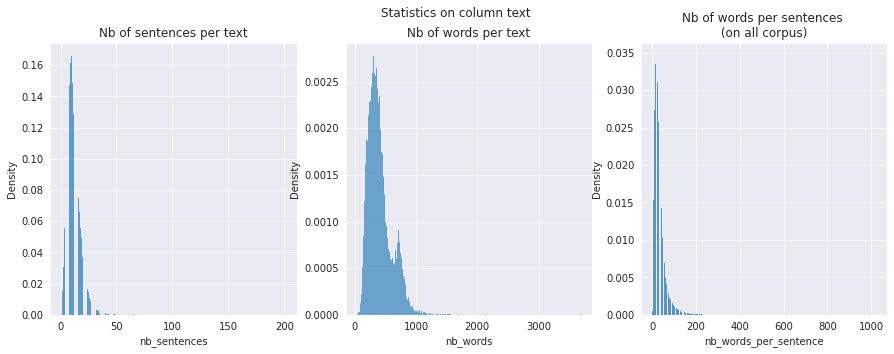

In [ ]:
stats_lengths(df_orangesum_train, text_column='text')

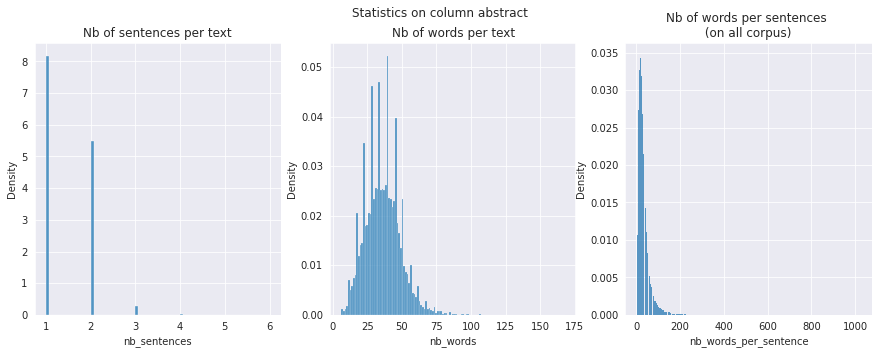

In [ ]:
stats_lengths(df_orangesum_train, text_column='abstract')

### Vocabulary, word distributions, bi-grams, ... :

Here are some important numbers concerning the vocabulary in OrangeSum (training dataset), given the fact that stopwords are excluded from all the vocabularies :

In [ ]:
vocabulary_orangesum_abstract_2 = vocab_update(dataset_orangesum['train'], text_features='target', remove_stopwords=True)

  0%|          | 0/21401 [00:00<?, ?it/s]

In [ ]:
nb_words_text, nb_words_abstract = vocabulary_orangesum['nbwords'], vocabulary_orangesum_abstract_2['nbwords']
print(f"Number of words in OrangeSum (texts) vocabulary : {nb_words_text}")
print(f"Number of words in OrangeSum (abstract) vocabulary : {nb_words_abstract} (ie {(nb_words_abstract/nb_words_text)*100:.2f}% of text vocabulary)")

Number of words in OrangeSum (texts) vocabulary : 188084
Number of words in OrangeSum (abstract) vocabulary : 38448 (ie 20.44% of text vocabulary)


In [ ]:
def word_distribution (vocabulary, print_most_frequents = None) : 
    """
    Plot word distribution within a given vocabulary
    If print_most_frequents is an int, also print the print_most_frequents most frequent words
    """

    dist_words = np.fromiter(vocabulary['counts'].values(), dtype='int')

    # Plot word distributions :
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    sns.histplot(dist_words, ax=ax, stat='density')
    ax.set_title('Word distribution')
    plt.show()

    # Print most frequent words : 
    if print_most_frequents is not None :
        indices = np.argsort(dist_words)[:-print_most_frequents:-1]
        most_frequents = np.array(list(vocabulary['stoi'].keys()))[indices]
        print('Most frequent words :')
        print(most_frequents)

In [ ]:
# word_distribution(vocabulary_orangesum, print_most_frequents=20) : Really long to execute

### Topic description using a pretrained model :

To have an idea of the main topic of the articles of our corpus could be useful, for instance to compare the performance on our summarization model on different type of subjects that may be more or less factual, or to see if the main topic associated to our article is the same than the one associated to our generated summary. 

We used an already existing model found on Hugging Face : [`flaubert-mlsum-topic-classification`](https://huggingface.co/lincoln/flaubert-mlsum-topic-classification?text=La+bourse+de+paris+en+forte+baisse+apr%C3%A8s+que+des+canards+ont+envahit+le+parlement.). This is a classification model, trained on the french MLSUM dataset, which outputs a topic category within : "Culture, Economie, Education, Environnement, Justice, Opinion, Politique, Société, Sport, Technologie". 

Note that we didn't implement the topic modelization by ourselves as it was not the main purpose of our project, but we could have implemented an unsupervised topic modelling such as LDA ([Latent Dirichlet Allocation ](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)), which consists in finding the .

We follow here the instructions given in the [Hugging Face page](https://huggingface.co/lincoln/flaubert-mlsum-topic-classification?text=La+bourse+de+paris+en+forte+baisse+apr%C3%A8s+que+des+canards+ont+envahit+le+parlement.), so we do not have to deal with the pre-processing and tokenization, we re use the one given with the model :

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TextClassificationPipeline

In [ ]:
model_name = 'lincoln/flaubert-mlsum-topic-classification'

loaded_tokenizer = AutoTokenizer.from_pretrained(model_name)
loaded_model = AutoModelForSequenceClassification.from_pretrained(model_name)

topic_classifier = TextClassificationPipeline(model=loaded_model, tokenizer=loaded_tokenizer)

Downloading:   0%|          | 0.00/492 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/561k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/305 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

In [ ]:
def topic_description (df, text_column='text', title_plot=None) : 
    """
    Use flaubert-mlsum-topic-classification to assign a main topic to each article in df[text_column],
    stored in df[f'main_topic_{text_column}'],
    and plot the proportion of each topic in the corpus.

    !!! : execution might be really long...
    """

    # Creation of a new column in df to store the main topic : 
    new_column = 'main_topic_'+text_column
    df[new_column] = df[text_column].progress_apply(lambda x : topic_classifier(x, truncation=True)[0]['label'])

    # Computation of proportion of each topic in the corpus :
    stats_topics = df[[new_column,text_column]].groupby(new_column).count().reset_index()
    stats_topics[text_column] = stats_topics[text_column] *100 / stats_topics[text_column].sum() 

    # Plot in horizontal barplot :
    fig,ax = plt.subplots(1,1,figsize=(6,4))
    sns.barplot(data=stats_topics, x=text_column, y=new_column, orient='h', ax=ax, palette="Set2")
      # Titles :
    ax.set_xlabel('Proportion in the corpus (%)')
    ax.set_ylabel('Main topic')
    if title_plot is None :
        fig.suptitle(f'Main topic of column {text_column} in the corpus')
    else :
        fig.suptitle(title_plot)
    # Annotations : 
    for p in ax.patches:
        width = p.get_width()
        plt.text(4+p.get_width(), p.get_y()+0.55*p.get_height(),
                '{:1.1f}%'.format(width), ha='center', va='center')

Run on the $500$ first news article of our train set (computation time being very long...) :

100%|██████████| 500/500 [10:52<00:00,  1.30s/it]


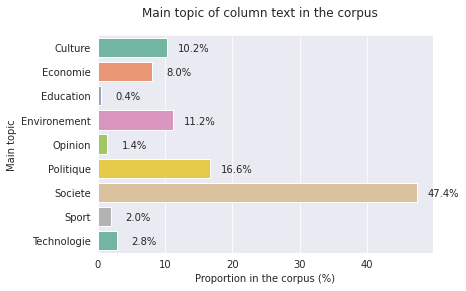

In [ ]:
# df_orangesum_train_500 = df_orangesum_train.copy()[:500] 
# topic_description(df_orangesum_train_500) 

$\hookrightarrow$ It seems that in the first articles of the corpus, the main topics are society and politics, that is to say mainly "abstractive" and "subjective" subjects. It may be harder for the model to understand the opinion within the articles, it can be something to check on our models.

We can also try to see if the main topic attributed to the articles are the same to the ones attributed to the abstracts :

In [ ]:
# df_orangesum_train_500['main_topic_abstract'] = df_orangesum_train_500['abstract'].progress_apply(lambda x : topic_classifier(x, truncation=True)[0]['label'])
# prop_match = (df_orangesum_train_500['main_topic_text']==df_orangesum_train_500['main_topic_abstract']).mean()*100

# print(f'Proportion of article-summary pairs with same main topic in the 500 first articles : {prop_match} %')

100%|██████████| 500/500 [01:30<00:00,  5.54it/s]

Proportion of article-summary pairs with same main topic in the 500 first articles : 74.8 %


## Extractive model (baseline) : TextRank algorithm

The first "naive" approach to address the text summarization task is an **extractive** method. It's an unsupervised model, which will try to identify the most revelant sentences in a given document, and will build a summary by extracting them. We will then obtain a summary composed of a "patchwork" of sentences from the article, we won't "generate new sentences".



**TextRank algorithm :**

We have chosen to implement the [TextRank](https://aclanthology.org/W04-3252.pdf) algorithm, which is similar to the PageRank algorithm proposed by Google, but applied here to the scoring of the sentences of a text. Here are the main steps of the algorithm, which will turn our problem into a graph problem :  

1. Identify text units that best define the task at hand, that is to say the sentences in our case, and add them as vertices in our graph.
2. Compute a similarity matrix between the sentences of our text, which will correspond to the weights given to each edges of our graph. Here are some possibilities for the choice of similarity measure between two sentences $S_i = w^i_1 ... w^i_{N_i}$ and $S_j = w^j_1 ... w^j_{N_j}$ :     
  * The similarity measure initially proposed by the TextRank article simply corresponds to the lenght of the overlapping content of both sentences : $$Similarity(S_i,S_j) = \frac{|\{w_k : w_k \in S_i \& w_k \in S_j \}|}{\log(|S_i|) + \log(|S_j|)}$$
  * If we use embedding techniques to transform our sentences into vectors $s_i, s_j \in \mathbb{R}^d$, we can for instance use the cosine similarity, defined by : $$Similarity(s_i,s_j) = \frac{<s_i,s_j>}{\|s_i\|\|s_j\|}$$

3. Iterate the graph-based ranking algorithm until convergence :
  - The score attributed to each sentence $S_i$ according to the weight of its edges defined in the previous step can be summed up into : $$Score(S_i) = (1-\gamma) + \gamma * \sum_{j \neq i} \left( \frac{Similarity(S_i,S_j)}{ \sum_{k \neq j} Similarity(S_k,S_j) } \right) Score(S_j) $$ with $\gamma \in (0,1)$ (authors recommand to choose $\gamma=0.85$). 
  - The previous score being non explicit, we initialize the scores of every sentence randomly, and apply the previous formula until convergence to obtain the final scores. 

4. Sort vertices based on their final score. Build then a summary by keeping the $x$ sentences with highest score, $x$ being chosen by the user.

---
**Pros :**
- The summary is only constructed regarding the given article, no additionnal training on an entire dataset is needed.

**Cons :**
- Sentences extracted from the text, which results in a "patchwork" not always coherent (pronouns, ...)
- May have issues for text composed of very long sentences.
---





#### Model definition :

In [35]:
from gensim.models import Word2Vec
from scipy import spatial

In [120]:
class TextRank () :

    def __init__ (self, gamma=0.85, max_iter=100, tol=1e-16) :
        self.gamma = gamma
        self.max_iter = max_iter
        self.tol = tol


    def get_similarity_matrix (self, text) : 
        """
        Implementation of the following "simple" method : 
          - use Word2Vec with 1 embedding dimension on each word of each sentence
            as a Seq2Vec model
          - use cosine similarity on the obtain sequences' vectors
        """
        tok_text = tokenize_clean_text(text)

        # Construction of text embeddings :
        w2v = Word2Vec(tok_text, size=1, min_count=1, iter=1000)
        text_embeddings=[[w2v[word][0] for word in words] for words in tok_text]
        max_len=max([len(tokens) for tokens in tok_text])
        text_embeddings = [np.pad(embedding,(0,max_len-len(embedding)),'constant') for embedding in text_embeddings]

        # Construction of similarity matrix : 
        nb_sentences = len(tok_text)
        similarity_matrix = np.zeros((nb_sentences,nb_sentences))
        for i,row_embedding in enumerate(text_embeddings):
            for j,column_embedding in enumerate(text_embeddings):
                similarity_matrix[i][j]=1-spatial.distance.cosine(row_embedding,column_embedding)

        return similarity_matrix


    def get_scores (self, similarity_matrix) : 
        # similarity matrix : SM, symmetric, with SM_{ij} = Similarity(S_i, S_j) and SM_{ii} = 0 (shape n x n)
        # output : scores attributed to each sentence (shape n)

        n = similarity_matrix.shape[0]
        # normalization of the similarity matrix by column :
        similarity = similarity_matrix / similarity_matrix.sum(axis=0)

        # Initialization of the scores : 
        scores = np.full(shape=n, fill_value=1/n) 
        error,iter = self.tol + 1, 0

        # Iteration of the algorithm : 
        while (error > self.tol) and (iter < self.max_iter) : 
            last_scores = scores.copy()

            # Iteration of the score formula :
            scores = np.dot(similarity , scores) * self.gamma + (1-self.gamma)

            # Computation of the error : 
            error = np.sum(abs(scores-last_scores))
            iter += 1

        # Normalization of the final scores :
        scores = scores / scores.sum()
        return scores

    def print_scores (self, text_sentences, scores) : 
        """
        Print given text_sentences with colors coresponding to their scores. 
        """
        on_colors = ['on_blue', 'on_cyan', 'on_green', 'on_yellow', 'on_magenta', 'on_red']

        indices = np.argsort(scores)

        # Attribution of colors :
        k_update = len(indices) // 6
        on_colors_ind = [0 for i in range(len(indices))]
        scores_bornes = []
        score_inf = 0
        on_color_id = 0
        k = 0
        for i in indices : 
          on_colors_ind[i] = on_color_id
          k += 1 
          if k >= k_update : 
            scores_bornes.append(f"{score_inf:.5f}-{scores[i]:.5f}")
            score_inf = scores[i]
            k = 0
            on_color_id +=1

        # Prints :
        print('Scale of scores :')
        print(' '.join( (colored(scores_bornes[k], 'white' , on_color) 
                        for k, on_color in enumerate(on_colors))))
        print('-'*200)
        print('\n'.join( (colored(text_sentences[k], 'white' , on_colors[on_colors_ind])
          for k, on_colors_ind in enumerate(on_colors_ind))))


    def summarize (self, text, nb_summary_seq = 2, print_score=False) : 
        similarity_matrix = self.get_similarity_matrix(text)
        scores = self.get_scores(similarity_matrix) 

        indices_best = np.argsort(scores)[:-(nb_summary_seq+1):-1]
        text_sentences = np.array(sent_tokenize(text))
        summary = ''.join(text_sentences[indices_best])

        if print_score : 
            self.print_scores(text_sentences, scores)

        return summary


#### Example of prediction : 

In [112]:
text = dataset_orangesum['train'][2]['input']
summary_real = dataset_orangesum['train'][2]['target']

Generation of the summary  :

In [113]:
summary_generated = TextRank().summarize(text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [114]:
summary_real

'En 2020, les tribunaux d\'instance fusionnent avec ceux de grande instance pour former un unique "tribunal judiciaire". C\'est la principale mesure de la réforme de la Justice, portée par la garde des sceaux Nicole Belloubet.\n'

In [115]:
summary_generated

'Alors que les particuliers pouvaient se présenter directement au greffe du tribunal d\'instance pour déposer leur requête, la réforme renforce le recours accru aux procédures dématérialisées et étend la représentation obligatoire par un avocat.Elle ne serait "pas étonnée" que le gouvernement ait souhaité "différer des annonces" selon les résultats électoraux de La République en marche dans les communes concernées, comme l\'écrivait Le Canard enchaîné dans une série d\'articles fin octobre.'

ROUGE scores between text and summary :

In [116]:
Rouge().get_scores(summary_generated, summary_real, avg=True)

{'rouge-1': {'f': 0.18749999562717026,
  'p': 0.13846153846153847,
  'r': 0.2903225806451613},
 'rouge-2': {'f': 0.019230764829882663,
  'p': 0.014285714285714285,
  'r': 0.029411764705882353},
 'rouge-l': {'f': 0.18749999562717026,
  'p': 0.13846153846153847,
  'r': 0.2903225806451613}}

We can also print the scores attributed to each sentence of the initial text : 

In [121]:
summary_generated = TextRank().summarize(text, print_score=True)

Scale of scores :
0.00000-0.03562 0.03562-0.04170 0.04170-0.04295 0.04295-0.04392 0.04392-0.04448 0.04448-0.04497
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
La mesure est décriée par les avocats et les magistrats.
Juridictions de proximité par excellence, traitant les litiges du quotidien, les tribunaux d'instance s'apprêtent à fusionner avec les tribunaux de grande instance.
Cette réorganisation est l'une des principales mesures de la réforme de la justice, promulguée le 23 mars.
Les professionnels s'inquiètent d'une dévitalisation de ces petites juridictions et d'un accès plus restreint au juge.
Réforme de la justice : pourquoi les avocats, magistrats et greffe sont-ils en colère ?par Le Dauphiné LibéréDepuis 1958, les tribunaux d'instance (TI) et les tribunaux de grande instance (TGI) se partageaient les contentieux civils, sel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


## Abstractive model

A more advanced approach to address text summarization ainms at "generating" the summary, that is to say to produce a summary with new generated sentences that do not exist in the text to summarize. 

For this task, we may use Deep Learning models, with models based on Encoder-Decoder approaches, using RNNs or Transformers for instance. 


In [122]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
print(f'Device : {device}')

Device : cuda


### RNN-based model :

In this part, we try to reuse the encoder-decoder based on RNN implemented in lab5 for translation. We will modify the embedding definition in both the encoder and the decoder, as we would like to use the embeddings vectors computed previously.

#### Architecture :

In [138]:
class EncoderRNN(nn.Module):
    def __init__(self, embeddings_vectors, padding_idx=1, device=device):
        super(EncoderRNN, self).__init__()

        self.embedding_dim = embeddings_vectors.shape[1]
        # we use an embedding layer : 
        self.embedding = nn.Embedding.from_pretrained(embeddings_vectors, freeze=True, padding_idx=padding_idx).to(device)       
        # we define a GRU layer (Gated Recurrent Unit), a simpler version of recurrent layer and way simple than LSTM
        self.gru = nn.GRU(self.embedding_dim, self.embedding_dim, device=device)

    def forward(self, input, hidden):
      # apply the embedding layer
      embedded = self.embedding(input)
      # modify the output shape in order for it to work with a GRU 
      output = embedded.view(-1,1,self.embedding_dim)
      # apply the GRU layer
      output, hidden = self.gru(output, hidden)
      # return both the output, and the hidden vector
      return output, hidden

    def initHidden(self):
        """ 
        method used to customize the hidden vector initialization.
        here the vector is initialized as 0 with the correct shape and created directly on the correct device
        """
        return torch.zeros(1, 1, self.embedding_dim, device=device)

In [139]:
class DecoderRNN(nn.Module):
    def __init__(self, embeddings_vectors, output_size=60, padding_idx=1, device=device):
        super(DecoderRNN, self).__init__()

        self.embedding_dim = embeddings_vectors.shape[1]
        self.output_size = output_size
        # we use an embedding layer : 
        self.embedding = nn.Embedding.from_pretrained(embeddings_vectors, freeze=True, padding_idx=padding_idx).to(device)       
        # we define a GRU layer (Gated Recurrent Unit), a simpler version of recurrent layer and way simple than LSTM
        self.gru = nn.GRU(self.embedding_dim, self.embedding_dim, device=device)
        self.out = nn.Linear(self.embedding_dim, output_size, device=device)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):

        # apply the embedding layer and modify the output shape in order for it to work with a GRU (we use batches of one element)
        output = self.embedding(input)
        output = output.view(-1,1,self.embedding_dim)

        # apply a ReLU non linearization layer
        output = F.relu(output)
        # apply the GRU layer
        output, hidden = self.gru(output, hidden)
        # apply a softmax to get probabilities, on the first element of the output vector (batch is equal to one)
        output = self.softmax(self.out(output[0]))
        # return both the output probabilities and the hidden vector
        return output, hidden

    def initHidden(self):
        """ 
        method used to customize the hidden vector initialization.
        here the vector is initialized as 0 with the correct shape and created directly on the correct device
        """
        return torch.zeros(1, 1, self.embedding_dim, device=device)

#### Training functions :

In [140]:
import random 
teacher_forcing_ratio = 0.5

In [141]:
max_length = 20

In [142]:
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=max_length, device=device):
    # put both encoder and decoder into trainning mode
    encoder.train()
    decoder.train()

    # use our custom initialization of hidden vector
    encoder_hidden = encoder.initHidden()

    # remove the gradient to prevent gradient accumulation
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # adapt the tensor sizes
    input_tensor = input_tensor.view(input_tensor.size(1), input_tensor.size(0)) #input_tensor.view(1,1,-1)
    target_tensor = target_tensor.view(target_tensor.size(1), target_tensor.size(0)) #target_tensor.view(1,1,-1)

    # keep the lengths in memory
    input_length = input_tensor.size(1)
    target_length = target_tensor.size(1)

    # prepare an empty output with the correct size and the correct device
    encoder_outputs = torch.zeros(max_length, encoder.embedding_dim, device=device)

    # init the loss to 0
    loss = 0

    # pass each token of the input_tensor to the encoder, then populate the output
    for ei in range(input_length):
      if ei >= max_length: break
      encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
      encoder_outputs[ei] = encoder_output[0, 0]

    # now we consider the decoder input, which starts only with the SOS token
    decoder_input = torch.tensor([[SOS_IDX]], device=device)

    # share the hidden vector from encoder to the decoder
    decoder_hidden = encoder_hidden

    # add a condition to teacher forcing
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden)
            # apply the NLL loss
            loss += criterion(decoder_output.to(device), target_tensor[di].to(device))
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
      # Without teacher forcing: use its own predictions as the next input
      for di in range(target_length):
          decoder_output, decoder_hidden = decoder(
              decoder_input, decoder_hidden)
          topv, topi = decoder_output.topk(1)
          decoder_input = topi.squeeze().detach()  # detach from history as input
          # compute the loss
          loss += criterion(decoder_output, target_tensor[di].to(device))
          # stop the iteration if the EOS token is predicted
          if decoder_input.item() == EOS_IDX:
              break
    
    # do the back propagation
    loss.backward()

    # notify each optimizers
    encoder_optimizer.step()
    decoder_optimizer.step()

    # return the average loss
    return loss.item() / target_length

In [170]:
def evaluate(encoder, decoder, vocabulary_decoder, input_tensor, target_tensor=None, max_length=max_length, criterion=None, device=device):
    """
    function to evaluate a translation of one sentence
    """
    # we evaluate, so we don't need gradients -> torch.no_grad()
    with torch.no_grad():
        
        if target_tensor is None: target_length = 0
        else: target_length = target_tensor.size(0)

        encoder_hidden = encoder.initHidden()

        decoding_length = target_length
        input_length = input_tensor.size(0)

        encoder_outputs = torch.zeros(max_length, encoder.embedding_dim, device=device)

        # iterate through the input length 
        for ei in range(input_length):
            if ei >= max_length: break
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_IDX]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        
        # init the loss (the loss is important if the cirterion is given - i.e. validation phase)
        loss = 0

        # iterate through decoding values, feeding the output for the next token until the condition or maximum lenght is reached
        for di in range(decoding_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            print(decoder_output.shape)
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_IDX:
                decoded_words.append('<eos>')
                break
            else:
                decoded_words.append(vocabulary_decoder['itos'][topi.item()])

            decoder_input = topi.squeeze().detach()
            # print(decoder_output.shape, decoder_output.max())
            # print(target_tensor[di].unsqueeze(0).shape,target_tensor[di].unsqueeze(0).max())
            if target_tensor != None and criterion is not None:
              loss += criterion(decoder_output.to(device), target_tensor[di].unsqueeze(0).to(device))
              if decoder_input.item() == EOS_IDX:
                break
            # print('ok4')
        return decoded_words, loss

In [171]:
def inference(target, loader, encoder, decoder, vocabulary_encoder, vocabulary_decoder, criterion, limit=0, text_column='text', summary_column='summary'):
  """
  fucntion to apply the inference logic over multiple translation and return a score
  used for validation
  """
  encoder.eval()
  decoder.eval()
  loss_it, glue_it = list(), list()
  preds, trues = list(), list()

  total = loader.__len__()
  if limit > 0: total = limit

  # iterate through the loader, can be a validation or test loader
  for it, batch in tqdm(enumerate(loader), desc="%s:" % (target), total=total):
    
    if limit > 0 and it >= limit: break

    input_tensor = batch[text_column].squeeze().to(device)
    target_tensor = batch[summary_column].squeeze().to(device)

    # dummy sentence because this function is used for validation, not on-demand test
    mock_sentence = "dummy sentence not used"

    # compute entry and target sentences as "real text"
    entry = [vocabulary_encoder['itos'][t] for t in input_tensor.tolist()]
    entry = ' '.join( [e for e in entry if e not in ['<pad>', '<sos>', '<eos>', '<unk>']] )
    true =  [vocabulary_decoder['itos'][t] for t in target_tensor.tolist()]
    true = ' '.join( [r for r in true if r not in ['<pad>', '<sos>', '<eos>', '<unk>']] )
    trues.append([true])

    pred, loss = evaluate(encoder, decoder, vocabulary_decoder, input_tensor=input_tensor, target_tensor=target_tensor, criterion=criterion)
    pred = ' '.join( [ h for h in pred if h not in ['<pad>', '<sos>', '<eos>', '<unk>'] ] )
    preds.append(pred)
    if criterion is not None: 
      try:
        loss_it.append(loss.item())
      except: pass
    else: loss_it.append(loss)

  # ROUGE score :
  rouge_scoring = ROUGE()
  rouge_scores = rouge.get_scores(preds, trues, avg=True)

  loss_it_avg = sum(loss_it)/len(loss_it)

  print("%s : (%s %s) (%s %s)" % ( colored(target, 'blue'), colored('loss', 'cyan'), loss_it_avg, colored('rouge', 'cyan'), rouge_scores ))

  return trues, preds, loss_it_avg, loss_it, rouge_scores 

In [149]:
def run_epochs(train_loader, val_loader, encoder, decoder, vocabulary_encoder, vocabulary_decoder, max_epochs, learning_rate=0.01, limit=0, text_column='text', summary_column='summary', device=device):    
    
    # define the optimizer for both encoder and decoder separately.
    # You can change it later on
    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss(ignore_index=PAD_IDX)

    epoch_losses = []
    val_epoch_losses = []

    for ep in range(max_epochs):
      
      # TRAINING
      it_losses = []

      total = train_loader.__len__()
      # allow to limit the number of random samples per epoch
      if limit > 0: total = limit

      for iter, batch in tqdm(enumerate(train_loader), desc="Epoch %s:" % (ep), total=total):
          # trigger the limit if it is set
          if limit > 0 and iter >= limit: 
              break        

          input_tensor = batch[text_column].to(device)
          target_tensor = batch[summary_column].to(device)

          loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
          it_losses.append(loss)

      epoch_loss = sum(it_losses)/len(it_losses)
      epoch_losses.append(epoch_loss)
      print("Epoch %s : %s : (%s %s) " % (colored(str(ep), 'blue'), colored('Training', 'blue'), colored('loss', 'cyan'), epoch_loss  ))

      
      # VALIDATION
      trues, preds, val_loss_it_avg, val_loss_it, rouge_scores = inference("validation", val_loader, encoder, decoder, vocabulary_encoder, vocabulary_decoder, criterion, limit, text_column, summary_column)
      val_epoch_losses.append(val_loss_it_avg)

      
    return epoch_losses, val_epoch_losses

#### Training :

In [137]:
device='cpu'

In [146]:
epochs = 20

# embedding_matrix_orangesum = create_embedding_matrix(vocabulary_orangesum, pretrained_vectors_fasttext)
# embedding_matrix_orangesum_summary = create_embedding_matrix(vocabulary_orangesum_summary, pretrained_vectors_fasttext)

# instanciate the encoder
encoder = EncoderRNN(embedding_matrix_orangesum,device='cpu')
# instanciate the decoder
decoder = DecoderRNN(embedding_matrix_orangesum_summary,device='cpu')

In [172]:
run_epochs(orangesum_train_loader, orangesum_validation_loader, encoder, decoder, vocabulary_encoder=vocabulary_orangesum, vocabulary_decoder=vocabulary_orangesum_summary , max_epochs=epochs)

Epoch 0::   0%|          | 0/21401 [00:00<?, ?it/s]

Epoch 0 : Training : (loss 6.367502551188837e-06) 


validation::   0%|          | 0/1500 [00:00<?, ?it/s]

torch.Size([1, 60])
torch.Size([1, 60]) tensor(-0.0026)
torch.Size([1]) tensor(2)
ok4
torch.Size([1, 60])
torch.Size([1, 60]) tensor(-2.4557e-05)
torch.Size([1]) tensor(90)


IndexError: ignored

### Transformer-based model :

The main idea of this model is to use a transformer architecture for modeling the encoder-decoder part of our model. We will add embeddings layers constructed from the embedding matrices or vector defined in the cleaning section, a classical positional encoding (with sine and cosine computations), and complete our model by adding a final layer to recover the vocabulary length from the output of the decoder.

For this implementation, we got inspiration from BARTHez model, but also to some tutorials using keras, such as [this one](https://www.kaggle.com/code/ashishsingh226/text-summarization-with-transformers). 

In [ ]:
import math

#### Architecture :

In [ ]:
# Taken from https://pytorch.org/tutorials/beginner/transformer_tutorial.html :

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout= 0.1, max_len=1000, device=device):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x) :
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)].to(device)
        return self.dropout(x)

In [ ]:
class AbstractiveTransformerModel () : 

    def __init__(self, embeddings_text_vectors, embeddings_summary_vectors, padding_idx=1,
                 num_encoder_layers=6, num_decoder_layers=6, nhead=12, 
                 dim_feedforward=768, activation=nn.GELU(), device=device) :

        super().__init__()

        self.embedding_dim = embeddings_text_vectors.shape[1]
        self.padding_idx = padding_idx
            # Define a function to compute padding masks :
        self.padding_mask = lambda text : (text==padding_idx).long()

        # Define the architecture of our model : 

          # Embedding with frozen parameters :
        self.embedding_encoder = nn.Embedding.from_pretrained(embeddings_text_vectors, freeze=True, padding_idx=padding_idx).to(device)
        self.embedding_decoder = nn.Embedding.from_pretrained(embeddings_summary_vectors, freeze=True, padding_idx=padding_idx).to(device)

          # Positionnal encoding : 
        self.positional_encoding = PositionalEncoding(d_model=self.embedding_dim)

          # Transformer using directly torch's implementation :
        transformer = nn.Transformer(d_model=self.embedding_dim, nhead=nhead, 
                                          num_encoder_layers=num_encoder_layers,
                                          num_decoder_layers=num_decoder_layers,
                                          dim_feedforward=dim_feedforward, 
                                          activation=activation).to(device)
        self.encoder = transformer.encoder
        self.decoder = transformer.decoder 

          # Final layer to obtain back vocabulary_summary_size :
        vocab_summary_size = embeddings_summary_vectors.shape[0]
        self.last_layer = nn.Linear(in_features=self.embedding_dim, out_features=vocab_summary_size,device=device)

 
    def forward (self, text, target) : 
        # Encoding :
        text_key_padding_mask = self.padding_mask(text) # shape batch_len x max_text_len
        text = self.embedding_encoder(text)
        text = self.positional_encoding(text.permute(1,0,2)) # Add positional encoding
          # text : shape max_text_len x batch_len x embedding_dim
        
        encoder_output = self.encoder(text, src_key_padding_mask=text_key_padding_mask)
        print('encoded')

        # Decoding :
        target_key_padding_mask = self.padding_mask(target) # shape batch_len x max_text_len
        target = self.embedding_decoder(target)
        target = self.positional_encoding(target.permute(1,0,2)) # Add positional encoding
          # target : shape max_text_len x batch_len x embedding_dim
        
        decoder_output = self.decoder(tgt=target, memory=encoder_output, tgt_key_padding_mask=target_key_padding_mask)

        # Final layer to obtain back the desired dimension :
        output = self.last_layer(decoder_output)

        return output

In [ ]:
# Smaller parameters : 
# (the parameters per default of the model correspond to BART architecture,
# but they are really high, so we will change them into smaller ones)
num_encoder_layers = 3 
num_decoder_layers = 3 
nhead = 4
dim_feedforward = 512

---

Brouillon - Test :

In [ ]:
a = next(iter(orangesum_train_loader))

In [ ]:
text, target = a['text'].to(device), a['summary'].to(device)

In [ ]:
a['text'].shape

torch.Size([64, 1000])

In [ ]:
embedding_matrix_orangesum_summary = create_embedding_matrix(vocabulary_orangesum_summary, pretrained_vectors_fasttext)

Random new embeddings were created for 2869 words, ie 13.74% of the vocabulary


In [ ]:
embedding_matrix_orangesum.shape

torch.Size([43584, 300])

In [ ]:
embedding_matrix_orangesum_summary.shape

torch.Size([20878, 300])

In [ ]:
atm = AbstractiveTransformerModel(embeddings_text_vectors=embedding_matrix_orangesum, embeddings_summary_vectors=embedding_matrix_orangesum_summary,
                                  num_encoder_layers = 3, num_decoder_layers = 3, nhead = 4, dim_feedforward = 512,
                                  device=device)

In [ ]:
output = atm.forward(text, target)

---

## Tests & Experiments